In [1]:
''' import '''
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
''' load data '''
data = io.loadmat('./data/hw3_prob1b.mat')

A = data['A']
d = data['d']
x_orig = data['x_orig']

M, N = A.shape

In [45]:
''' hyper param '''
LAMBDA = 2
DELTA = 7
MAXITERS = 10000
CRIT = 1e-4

t = 1/la.norm(A, ord=2)**2 # step size

In [46]:
''' function '''
def soft_thres(z, t):
    return np.sign(z)*np.maximum(np.abs(z) - t, 0)

def hard_thres(z, t):
    return np.where(np.abs(z) >= t, z, 0)

def trunc(z, t):
    return np.sign(z)*np.minimum(np.abs(z), t)

In [47]:
''' conventional L1-norm (FISTA)  '''

f_hist_conv = []

x = np.zeros((N, 1))
y = x
x_prev = x

W = np.ones((N, 1)) # fixed W

for k in range(MAXITERS):

    # f
    f = 1/2*la.norm(A@x - d)**2 + LAMBDA*la.norm(W*x, 1)
    grad_gy = A.T@(A@y - d)

    # update x, y
    x = soft_thres(y - t*grad_gy, LAMBDA*t*W)
    y = x + k/(k+3)*(x - x_prev)

    # stop condition
    if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
        break
    
    x_prev = x
    
    # history
    f_hist_conv.append(f)

    print(f'i = {k}, f = {f}')

# optimal
x_conv = x

i = 0, f = 132520.32617243959
i = 1, f = 25917.770605759753
i = 2, f = 13929.85332824519
i = 3, f = 11302.66476878548
i = 4, f = 10746.190220357515
i = 5, f = 10495.480084756404
i = 6, f = 10258.99222453203
i = 7, f = 10026.134068802638
i = 8, f = 9803.327695506146
i = 9, f = 9593.156788153787
i = 10, f = 9394.030311194465
i = 11, f = 9207.159888270025
i = 12, f = 9031.000345716458
i = 13, f = 8862.431695501358
i = 14, f = 8704.573691559533
i = 15, f = 8555.885999842909
i = 16, f = 8417.30858842466
i = 17, f = 8289.293286596525
i = 18, f = 8169.376314254847
i = 19, f = 8054.7181534029205
i = 20, f = 7946.789782049969
i = 21, f = 7848.037049659383
i = 22, f = 7753.1535588859815
i = 23, f = 7665.348954085672
i = 24, f = 7582.468929123049
i = 25, f = 7503.974755699723
i = 26, f = 7428.903989095855
i = 27, f = 7359.380403273766
i = 28, f = 7294.030538412034
i = 29, f = 7230.974347205225
i = 30, f = 7171.883643593724
i = 31, f = 7115.365511942509
i = 32, f = 7060.013627553424
i = 33, f = 70

In [53]:
''' reweighted L1-norm (FISTA) '''

f_hist_rewei = []

# x = np.zeros((N, 1))
x = x_conv # initial x_1
y = x

W = np.ones((N, 1))
DELTA = 10

for k in range(MAXITERS):

    # f
    f = 1/2*la.norm(A@x - d)**2 + LAMBDA*la.norm(W*x, 1)
    grad_gy = A.T@(A@y - d)

    # update x, y
    x = soft_thres(y - t*grad_gy, LAMBDA*t*W)
    y = x + k/(k+3)*(x - x_prev)
    W = 1 / (np.abs(x) + DELTA) # changable W

    # stop condition
    if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
        break
    
    x_prev = x
    
    # history
    f_hist_rewei.append(f)

    print(f'i = {k}, f = {f}')

# optimal
x_rewei = x

i = 0, f = 5348.116535964486
i = 1, f = 242.88611056070764
i = 2, f = 182.28194181889094
i = 3, f = 170.0619736067314
i = 4, f = 167.16403587431634
i = 5, f = 165.7525631756439
i = 6, f = 164.60932867083267
i = 7, f = 163.60848449823985
i = 8, f = 162.70821533447537
i = 9, f = 161.88673466445874
i = 10, f = 161.13762789810923
i = 11, f = 160.45169107061238
i = 12, f = 159.80541959539931
i = 13, f = 159.20957913727187
i = 14, f = 158.6513011078041
i = 15, f = 158.12763869805363
i = 16, f = 157.64464008936716
i = 17, f = 157.19425610633377
i = 18, f = 156.7812321310478
i = 19, f = 156.4147941063609
i = 20, f = 156.07292177662958
i = 21, f = 155.7566818807654
i = 22, f = 155.4605287881768
i = 23, f = 155.18471544599655
i = 24, f = 154.92606538946595
i = 25, f = 154.6877363907462
i = 26, f = 154.45562329144084
i = 27, f = 154.24812047199293
i = 28, f = 154.04687360328398
i = 29, f = 153.85611449688164
i = 30, f = 153.67587238630924
i = 31, f = 153.50404985979912
i = 32, f = 153.34228679362

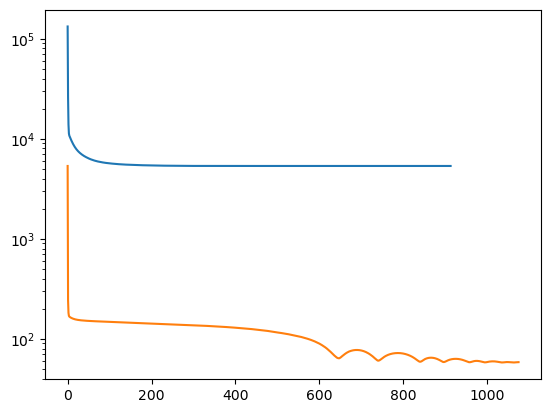

In [54]:
plt.semilogy(f_hist_conv)
plt.semilogy(f_hist_rewei)

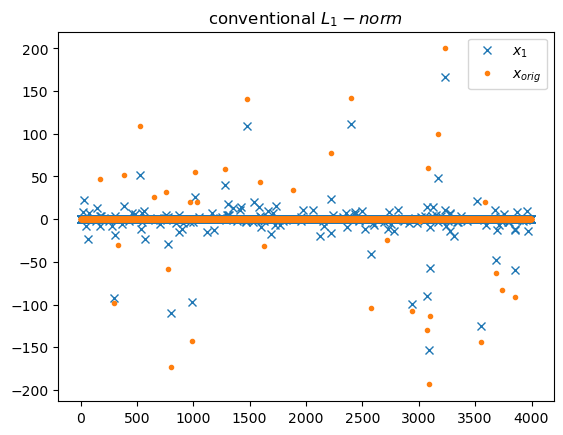

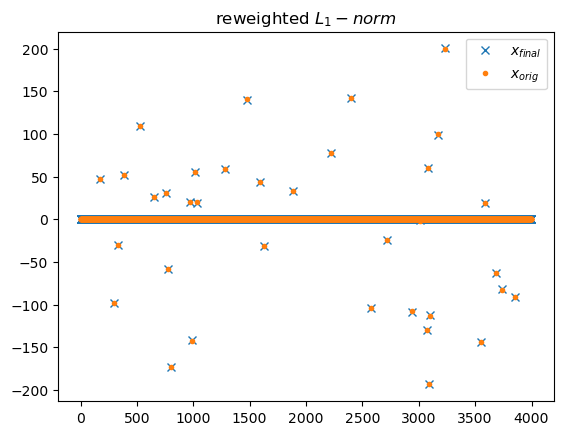

In [50]:
# plot
plt.title('conventional $L_1-norm$')
plt.plot(x_conv, linestyle='', marker='x', label='$x_1$')
plt.plot(x_orig, linestyle='', marker='.', label='$x_{orig}$')
plt.legend()
plt.show()

plt.title('reweighted $L_1-norm$')
plt.plot(x_rewei, linestyle='', marker='x', label='$x_{final}$')
plt.plot(x_orig, linestyle='', marker='.', label='$x_{orig}$')
plt.legend()
plt.show()

In [51]:
# ''' find delta : reweighted L1-norm (FISTA)  '''

# f_delta_hist = []
# x_delta_hist = []

# delta_list = np.arange(1, 10, 0.1)

# for delta in delta_list:

#     x = np.zeros((N, 1))
#     y = x

#     W = np.ones((N, 1))

#     for k in range(MAXITERS):

#         # f
#         f = 1/2*la.norm(A@x - d)**2 + LAMBDA*la.norm(W*x, 1)
#         grad_gy = A.T@(A@y - d)

#         # update x, y
#         x = soft_thres(y - t*grad_gy, LAMBDA*t*W)
#         y = x + k/(k+3)*(x - x_prev)
#         W = 1 / (np.abs(x) + delta) # changable W

#         # stop condition
#         if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
#             break
        
#         x_prev = x
        
#     # optimal
#     f_delta_hist.append(f)
#     x_delta_hist.append(x)
    
#     print(f'delta = {delta}, iter = {k}, f = {f}')

In [52]:
# # plot
# plt.title('appropriate $\\delta$')
# plt.plot(f_delta_hist)

# plt.xlabel('$\\delta$')
# plt.ylabel('f')
# plt.vlines(51, 50, 65, colors='red', linestyles='--', label='$\\delta = 6.1$')
# plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# plt.legend()
# plt.grid()
# plt.show()